In [1]:
from pyspark import SparkContext
from pyspark.ml.feature import VectorAssembler 
import numpy as np
from plot_tool import *
from pyspark.sql.functions import *
from pyspark.sql.types import *
from load_dataset import *

In [2]:
spark=SparkSession.builder.appName('forest').getOrCreate()      
forest_df=spark.read.csv("hdfs://namenode//covtype.csv",header=True,inferSchema=True).withColumn("Cover_Type",col("Cover_Type")-1)
forest_df.printSchema()

root
 |-- Elevation: integer (nullable = true)
 |-- Aspect: integer (nullable = true)
 |-- Slope: integer (nullable = true)
 |-- Horizontal_Distance_To_Hydrology: integer (nullable = true)
 |-- Vertical_Distance_To_Hydrology: integer (nullable = true)
 |-- Horizontal_Distance_To_Roadways: integer (nullable = true)
 |-- Hillshade_9am: integer (nullable = true)
 |-- Hillshade_Noon: integer (nullable = true)
 |-- Hillshade_3pm: integer (nullable = true)
 |-- Horizontal_Distance_To_Fire_Points: integer (nullable = true)
 |-- Wilderness_Area1: integer (nullable = true)
 |-- Wilderness_Area2: integer (nullable = true)
 |-- Wilderness_Area3: integer (nullable = true)
 |-- Wilderness_Area4: integer (nullable = true)
 |-- Soil_Type1: integer (nullable = true)
 |-- Soil_Type2: integer (nullable = true)
 |-- Soil_Type3: integer (nullable = true)
 |-- Soil_Type4: integer (nullable = true)
 |-- Soil_Type5: integer (nullable = true)
 |-- Soil_Type6: integer (nullable = true)
 |-- Soil_Type7: integer

In [3]:
print("number of data items: ",forest_df.count())
print("number of data classes: ",forest_df.select('Cover_Type').distinct().count())
print("number of data features: ", len(forest_df.columns)-1)

number of data items:  581012
number of data classes:  7
number of data features:  54


In [4]:
type0_df=forest_df.filter(forest_df.Cover_Type==0)#Spruce/Fir
type1_df=forest_df.filter(forest_df.Cover_Type==1)#Lodgepole Pine
type2_df=forest_df.filter(forest_df.Cover_Type==2)#Ponderosa Pine
type3_df=forest_df.filter(forest_df.Cover_Type==3)#Cottonwood/Willow
type4_df=forest_df.filter(forest_df.Cover_Type==4)#Aspen
type5_df=forest_df.filter(forest_df.Cover_Type==5)#Douglas-fir
type6_df=forest_df.filter(forest_df.Cover_Type==6)#Krummholz

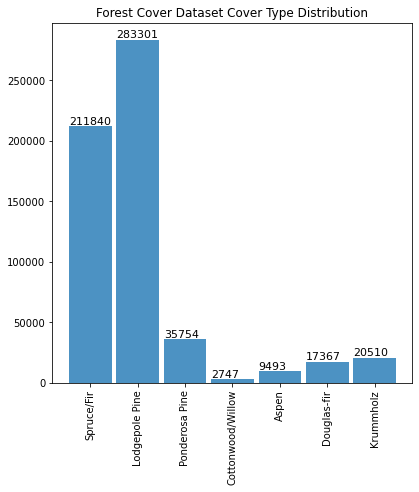

In [5]:
trees_name = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 
              'Aspen', 'Douglas-fir', 'Krummholz']
trees_number_by_type = [type0_df.count(),type1_df.count(),type2_df.count(),
                        type3_df.count(),type4_df.count(),type5_df.count(),type6_df.count()]
plot_bar(bar_width=0.9, bars=trees_name, data_list=trees_number_by_type, 
         title='Forest Cover Dataset Cover Type Distribution',figure_size=[5,5])
#The distribution shows that the dataset is highly uneven in types.
#So I covered all the type 3, 4, 5 and 6 in training and validation data.

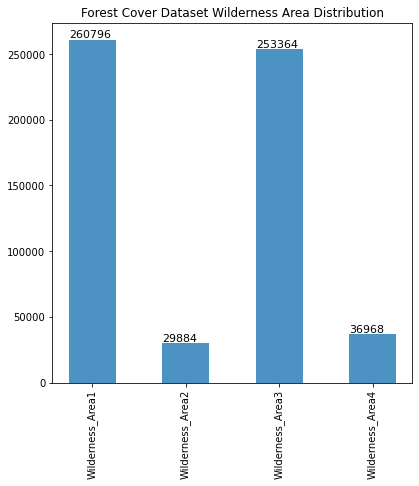

In [6]:
feature_names=get_features_title()
wilderness_area_df_count_list=[]
for i in range(10,14):
    wilderness_area_df_count_list.append(forest_df.filter(col(feature_names[i])==1).count())
plot_bar(bar_width=0.5, bars=feature_names[10:14], data_list=wilderness_area_df_count_list, 
         title='Forest Cover Dataset Wilderness Area Distribution',figure_size=[5,5])

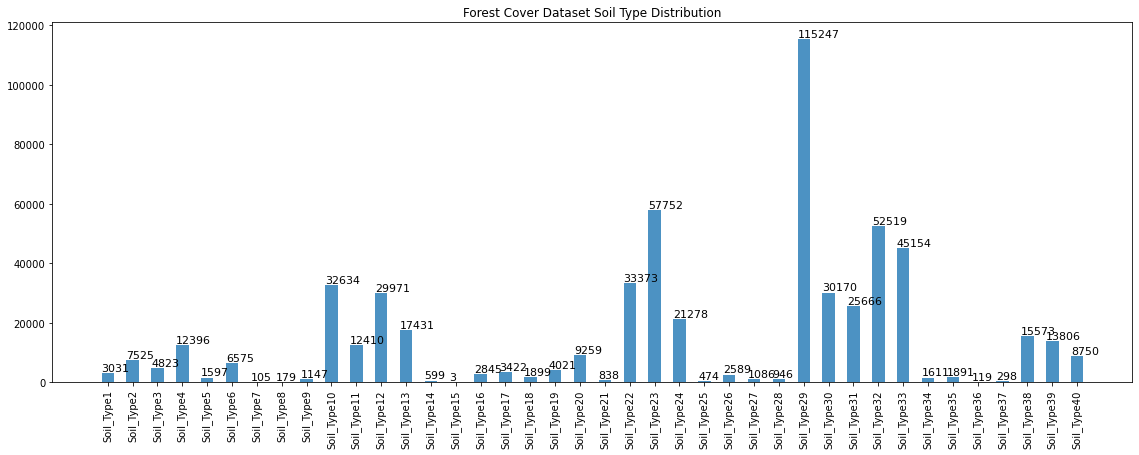

In [7]:
soil_type_df_count_list=[]
for i in range(14,54):
    soil_type_df_count_list.append(forest_df.filter(col(feature_names[i])==1).count())
plot_bar(bar_width=0.5, bars=feature_names[14:54], data_list=soil_type_df_count_list, 
         title='Forest Cover Dataset Soil Type Distribution',figure_size=[15,5])

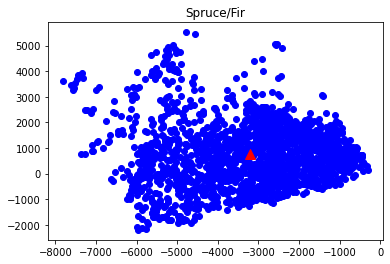

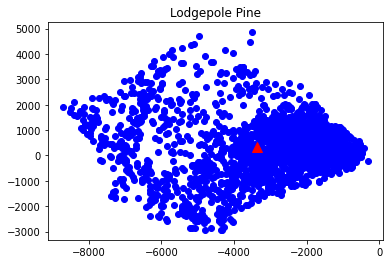

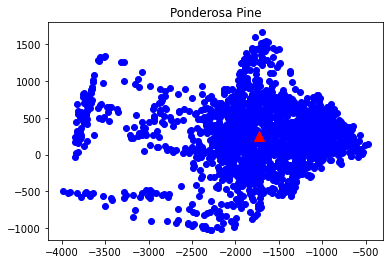

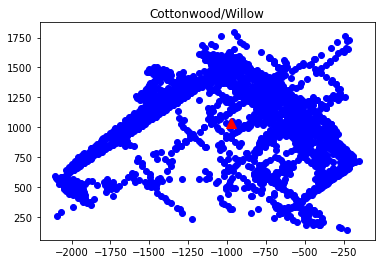

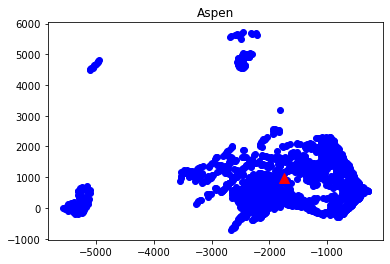

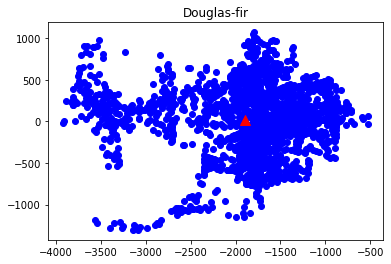

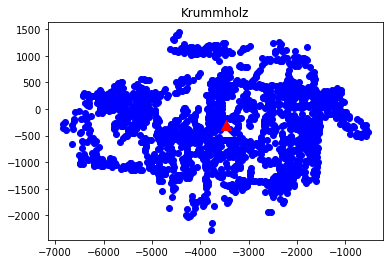

In [8]:
plot_pca(myrdd=type0_df.limit(2000).rdd.map(list), title=trees_name[0],color='blue')
plot_pca(myrdd=type1_df.limit(2000).rdd.map(list), title=trees_name[1],color='blue')
plot_pca(myrdd=type2_df.limit(2000).rdd.map(list), title=trees_name[2],color='blue')
plot_pca(myrdd=type3_df.limit(2000).rdd.map(list), title=trees_name[3],color='blue')
plot_pca(myrdd=type4_df.limit(2000).rdd.map(list), title=trees_name[4],color='blue')
plot_pca(myrdd=type5_df.limit(2000).rdd.map(list), title=trees_name[5],color='blue')
plot_pca(myrdd=type6_df.limit(2000).rdd.map(list), title=trees_name[6],color='blue')

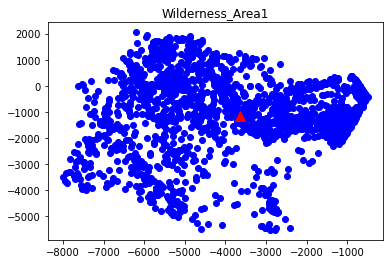

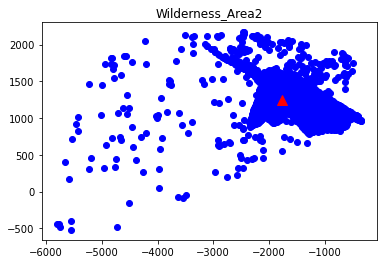

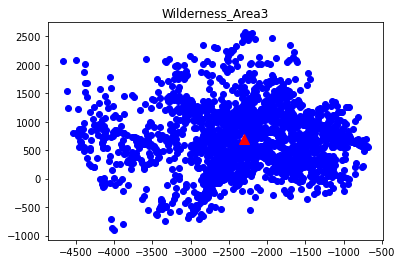

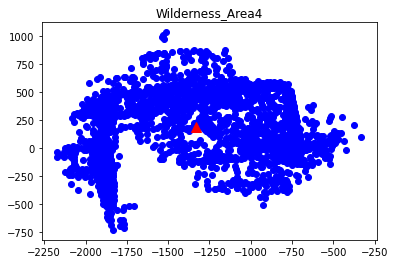

In [9]:
plot_pca(myrdd=forest_df.filter(forest_df.Wilderness_Area1==1).limit(2000).rdd.map(list), title='Wilderness_Area1',color='blue')
plot_pca(myrdd=forest_df.filter(forest_df.Wilderness_Area2==1).limit(2000).rdd.map(list), title='Wilderness_Area2',color='blue')
plot_pca(myrdd=forest_df.filter(forest_df.Wilderness_Area3==1).limit(2000).rdd.map(list), title='Wilderness_Area3',color='blue')
plot_pca(myrdd=forest_df.filter(forest_df.Wilderness_Area4==1).limit(2000).rdd.map(list), title='Wilderness_Area4',color='blue')